# Load MNIST-Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv('./mnist_train.csv')

print(d0.head(5))

l = d0['label']
d = d0.drop('label',axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [6]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


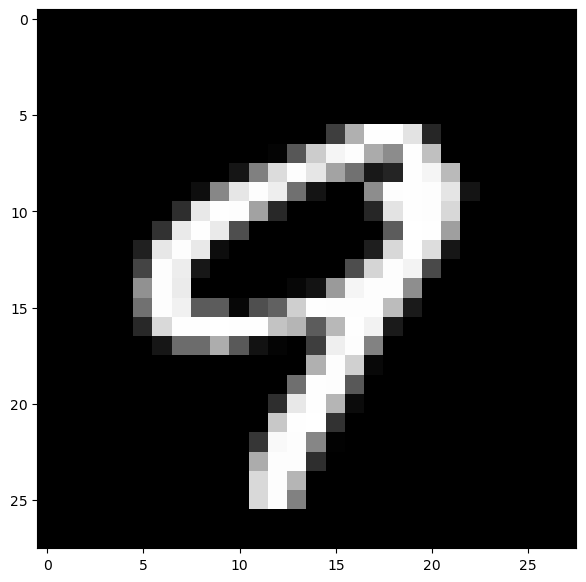

9


In [14]:
plt.figure(figsize=(7,7))
idx = 100

grid_data = d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

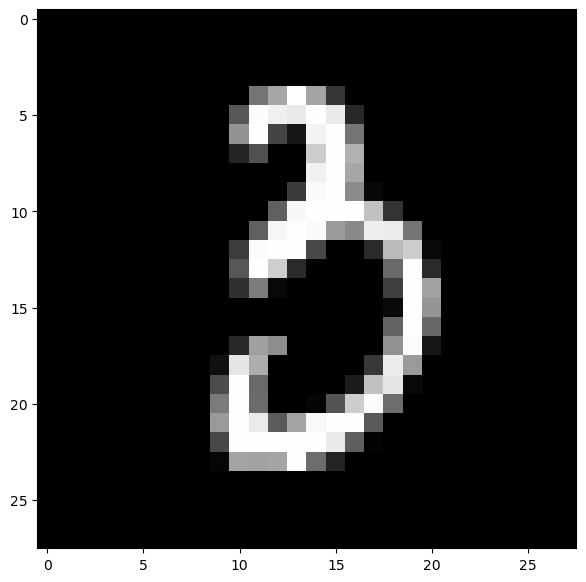

3


In [15]:
plt.figure(figsize=(7,7))
idx = 150

grid_data = d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

# 2D Visualization using PCA

In [2]:
labels = l.head(15000)
data = d.head(15000)

print("The shape of sample data = ",data.shape)

The shape of sample data =  (15000, 784)


In [3]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [4]:
sample_data = standardized_data

covar_matrix = np.matmul(sample_data.T,sample_data)

print('The shape of covariance matrix = ',covar_matrix.shape)

The shape of covariance matrix =  (784, 784)


In [5]:
from scipy.linalg import eigh

values,vectors = eigh(covar_matrix,eigvals=(782,783))

print('The shape of eigen vectors = ',vectors.shape)

vectors = vectors.T

print('The updated shape of eigen vectors = ',vectors.shape)

The shape of eigen vectors =  (784, 2)
The updated shape of eigen vectors =  (2, 784)


C:\Users\CR3003TU\AppData\Local\Temp\ipykernel_7144\2917724686.py:3: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values,vectors = eigh(covar_matrix,eigvals=(782,783))


In [6]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors,sample_data.T)
print("resultant new data points' shape",vectors.shape,"x",sample_data.shape,"=",new_coordinates.shape)

resultant new data points' shape (2, 784) x (15000, 784) = (2, 15000)


In [7]:
import pandas as pd

new_coordinates = np.vstack((new_coordinates,labels)).T
dataframe = pd.DataFrame(data=new_coordinates,columns=("1st_principal","2nd_principal","label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


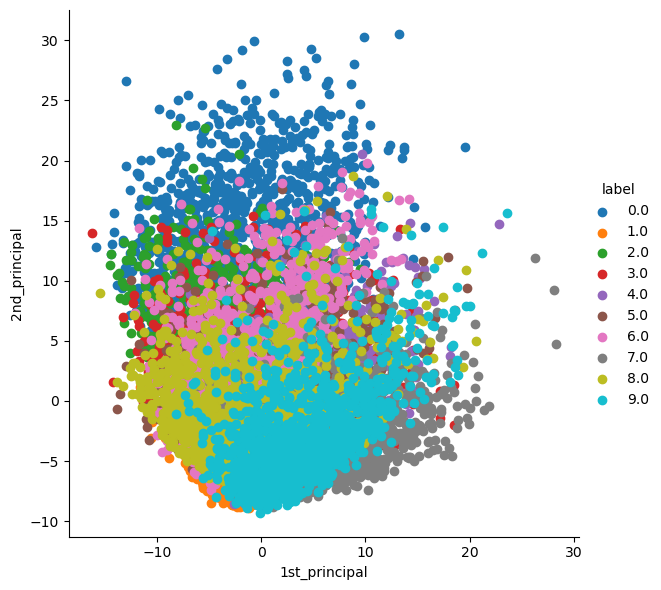

In [8]:
#plotting 2D data points using seaborn
import seaborn as sns
sns.FacetGrid(dataframe,hue='label',height=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [23]:
from sklearn import decomposition
pca = decomposition.PCA()

In [24]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print("shape of pca_reduced.shape = ",pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


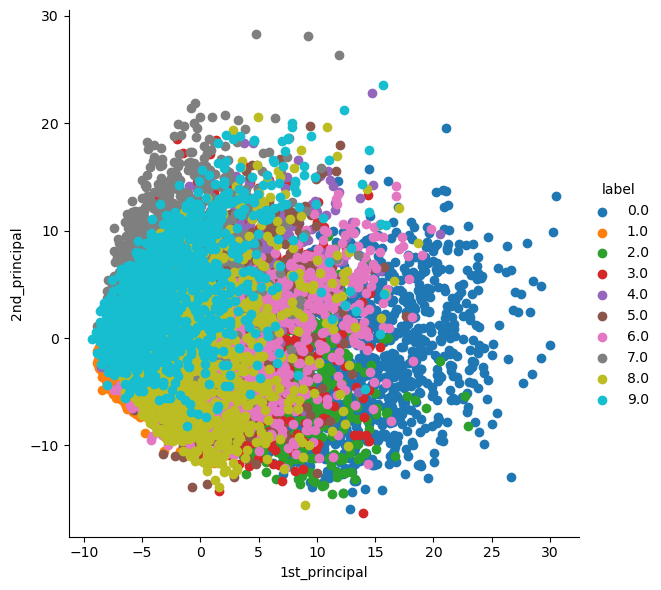

In [25]:
pca_data = np.vstack((pca_data.T,labels)).T

pca_df = pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","label"))
sns.FacetGrid(pca_df,hue='label',height=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

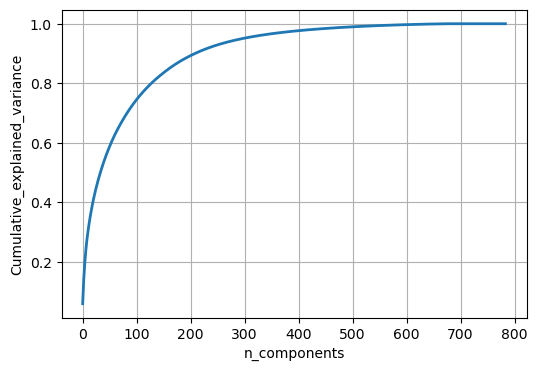

In [26]:
#PCA for dimensionality reduction (non-visualization)
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

#Plot the PCA spectrum
plt.figure(1,figsize = (6,4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

# t-SNE using Scikit-learn

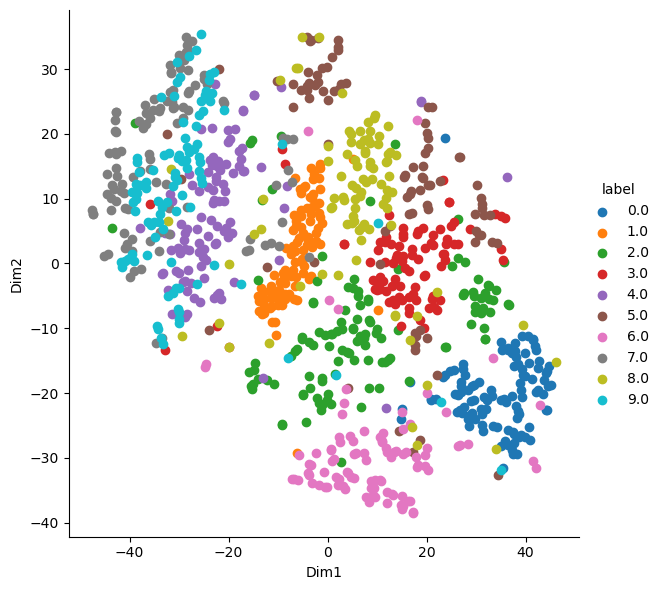

In [14]:
#TSNE
from sklearn.manifold import TSNE

data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2,random_state=0)

tsne_data = model.fit_transform(data_1000)

#creating new dataframe
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns = ("Dim1","Dim2","label"))

#Plotting the result of tsne
sns.FacetGrid(tsne_df,hue="label",height=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.show()


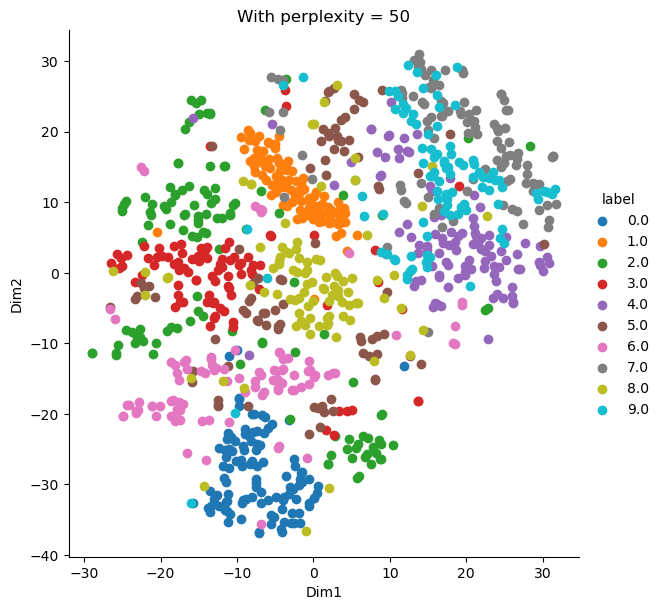

In [16]:

data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2,random_state=0,perplexity=50)

tsne_data = model.fit_transform(data_1000)

#creating new dataframe
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns = ("Dim1","Dim2","label"))

#Plotting the result of tsne
sns.FacetGrid(tsne_df,hue="label",height=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("With perplexity = 50")
plt.show()


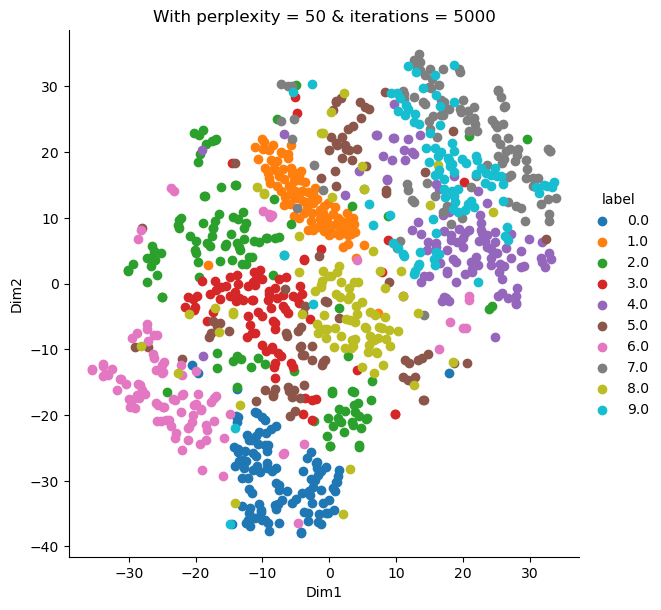

In [17]:

data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)

tsne_data = model.fit_transform(data_1000)

#creating new dataframe
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns = ("Dim1","Dim2","label"))

#Plotting the result of tsne
sns.FacetGrid(tsne_df,hue="label",height=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("With perplexity = 50 & iterations = 5000")
plt.show()


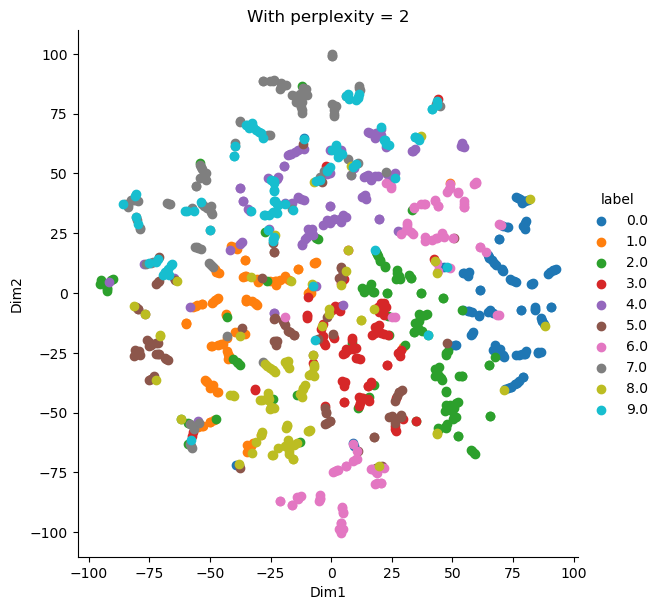

In [18]:
model = TSNE(n_components=2,random_state=0,perplexity=2)

tsne_data = model.fit_transform(data_1000)

#creating new dataframe
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns = ("Dim1","Dim2","label"))

#Plotting the result of tsne
sns.FacetGrid(tsne_df,hue="label",height=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("With perplexity = 2")
plt.show()
